In [1]:
#load all csv files

import pandas as pd

df_1990_1999 = pd.read_csv('data/resale-flat-prices-based-on-approval-date-1990-1999.csv')
df_2000_2012 = pd.read_csv('data/resale-flat-prices-based-on-approval-date-2000-feb-2012.csv')
df_2015_2016 = pd.read_csv('data/resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv')
df_2017 = pd.read_csv('data/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')
df_2012_2014 = pd.read_csv('data/resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv')

print(df_2017.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156849 entries, 0 to 156848
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                156849 non-null  object 
 1   town                 156849 non-null  object 
 2   flat_type            156849 non-null  object 
 3   block                156849 non-null  object 
 4   street_name          156849 non-null  object 
 5   storey_range         156849 non-null  object 
 6   floor_area_sqm       156849 non-null  float64
 7   flat_model           156849 non-null  object 
 8   lease_commence_date  156849 non-null  int64  
 9   remaining_lease      156849 non-null  object 
 10  resale_price         156849 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 13.2+ MB
None


In [2]:
#merge all csv files into single Pandas DataFrame

list = [df_1990_1999, df_2000_2012, df_2015_2016, df_2017, df_2012_2014]

merged_df = pd.DataFrame()
merged_df = pd.concat(list)
    
display(merged_df)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
52198,2014-12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0,NaN
52199,2014-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0,NaN
52200,2014-12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0,NaN
52201,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0,NaN


In [3]:
#Drop the 'remaining_lease' column

merged_df2 = merged_df.copy()
merged_df2 = merged_df2.drop('remaining_lease', axis=1)
print(merged_df2.isnull().sum())

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64


Are there any columns that contain null values or empty strings?

No, there are no columns that contain null values or empty strings.

In [4]:
#Convert the `month` column to date-time format

merged_df2['month'] = pd.to_datetime(merged_df2['month'], format = '%Y-%m')

print(merged_df2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 903052 entries, 0 to 52202
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                903052 non-null  datetime64[ns]
 1   town                 903052 non-null  object        
 2   flat_type            903052 non-null  object        
 3   block                903052 non-null  object        
 4   street_name          903052 non-null  object        
 5   storey_range         903052 non-null  object        
 6   floor_area_sqm       903052 non-null  float64       
 7   flat_model           903052 non-null  object        
 8   lease_commence_date  903052 non-null  int64         
 9   resale_price         903052 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 75.8+ MB
None


Text(0.5, 1.0, 'Resale transactions by month')

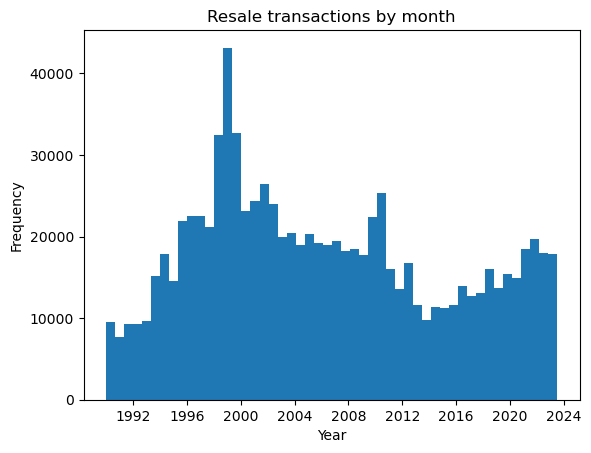

In [5]:
# Design a visualization to analyse the `month` column by considering it as a numeric date-time and share insights. 
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.hist(merged_df2['month'], bins=50)
axes1.set_xlabel('Year')
axes1.set_ylabel('Frequency')
axes1.set_title('Resale transactions by month')

Insights: This graph shows that from the month 1990 to 1998, there is a sharp increase in number of resale flats transacted, followed by a decline in number of resale flats transacted until 2013. From 2013 onwards, the number of resale flats transacted started to increase until 2023. This could be due to market recessions in 1998 and 2008 which caused the prices of houses to drop drastically. Another point to note is there there is a spike in resale transactions somewhere in 2010-2011 despite the decline in transactions. This could be due to large real estate corporations transacting flats at a larger scale.

In [6]:
# Compute a new column called `storey_level` by calculating the average of the lower and upper storey values. 

merged_df2['storey_level'] = (merged_df2['storey_range'].str[:2].astype(int) + merged_df2['storey_range'].str[-2:].astype(int)) /2

# Drop the `storey_range` column from the DataFrame

merged_df2 = merged_df2.drop('storey_range', axis=1)
display(merged_df2)

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey_level
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000.0,11.0
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,5.0
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,8000.0,11.0
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,8.0
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,47200.0,5.0
...,...,...,...,...,...,...,...,...,...,...
52198,2014-12-01,YISHUN,5 ROOM,816,YISHUN ST 81,122.0,Improved,1988,580000.0,11.0
52199,2014-12-01,YISHUN,EXECUTIVE,325,YISHUN CTRL,146.0,Maisonette,1988,540000.0,11.0
52200,2014-12-01,YISHUN,EXECUTIVE,618,YISHUN RING RD,164.0,Apartment,1992,738000.0,8.0
52201,2014-12-01,YISHUN,EXECUTIVE,277,YISHUN ST 22,152.0,Maisonette,1985,592000.0,8.0


In [7]:
# Identify inconsistent `flat_model` and `flat_type` values and perform the standardization of the values

print(merged_df2['flat_type'].unique())
print(merged_df2['flat_model'].unique())

merged_df2['flat_type'] = merged_df2['flat_type'].replace('MULTI-GENERATION', 'MULTI GENERATION')
merged_df2['flat_model'] = merged_df2['flat_model'].str.upper()
print()
print(merged_df2['flat_type'].unique())
print(merged_df2['flat_model'].unique())

['1 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' '2 ROOM' 'EXECUTIVE'
 'MULTI GENERATION' 'MULTI-GENERATION']
['IMPROVED' 'NEW GENERATION' 'MODEL A' 'STANDARD' 'SIMPLIFIED'
 'MODEL A-MAISONETTE' 'APARTMENT' 'MAISONETTE' 'TERRACE' '2-ROOM'
 'IMPROVED-MAISONETTE' 'MULTI GENERATION' 'PREMIUM APARTMENT' 'Improved'
 'New Generation' 'Model A' 'Standard' 'Apartment' 'Simplified'
 'Model A-Maisonette' 'Maisonette' 'Multi Generation' 'Adjoined flat'
 'Premium Apartment' 'Terrace' 'Improved-Maisonette' 'Premium Maisonette'
 '2-room' 'Model A2' 'Type S1' 'Type S2' 'DBSS' 'Premium Apartment Loft'
 '3Gen']

['1 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' '2 ROOM' 'EXECUTIVE'
 'MULTI GENERATION']
['IMPROVED' 'NEW GENERATION' 'MODEL A' 'STANDARD' 'SIMPLIFIED'
 'MODEL A-MAISONETTE' 'APARTMENT' 'MAISONETTE' 'TERRACE' '2-ROOM'
 'IMPROVED-MAISONETTE' 'MULTI GENERATION' 'PREMIUM APARTMENT'
 'ADJOINED FLAT' 'PREMIUM MAISONETTE' 'MODEL A2' 'TYPE S1' 'TYPE S2'
 'DBSS' 'PREMIUM APARTMENT LOFT' '3GEN']


C:\Users\user\AppData\Local\Temp\ipykernel_21496\1359647734.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


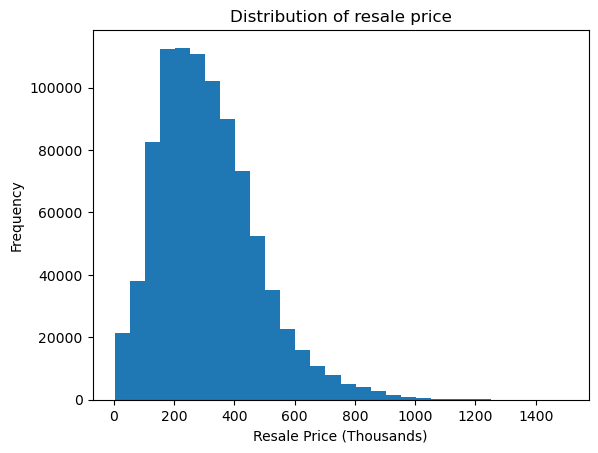

In [8]:
# Plot a histogram of the `resale_price` to understand its distribution

fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.hist(merged_df2['resale_price']/1000, bins=30)
axes1.set_xlabel('Resale Price (Thousands)')
axes1.set_ylabel('Frequency')
axes1.set_title('Distribution of resale price')

fig.show()

Is it normally distributed or skewed?

It is positively skewed. Means that there is a majority of houses in the lower prices compared to higher prices.

C:\Users\user\AppData\Local\Temp\ipykernel_21496\1963684820.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


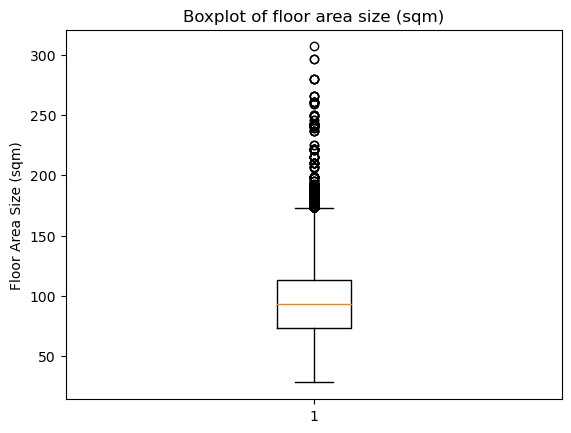

In [9]:
# Generate a boxplot for the `floor_area_sqm` column

fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.boxplot(merged_df2['floor_area_sqm'])
axes1.set_title('Boxplot of floor area size (sqm)')
axes1.set_ylabel('Floor Area Size (sqm)')

fig.show()

In [10]:
Q1 = merged_df2['floor_area_sqm'].quantile(0.25)
Q3 = merged_df2['floor_area_sqm'].quantile(0.75)
IQR = Q3 - Q1
maximum = Q3 + 1.5 * IQR
print(maximum)
display(merged_df2.query('floor_area_sqm > @maximum'))
print(merged_df2.query('floor_area_sqm > @maximum')['flat_model'].unique())

173.0


,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey_level
3203,1990-03-01,KALLANG/WHAMPOA,3 ROOM,55,JLN BAHAGIA,206.0,TERRACE,1972,120000.0,2.0
11125,1990-11-01,KALLANG/WHAMPOA,3 ROOM,45,JLN BAHAGIA,210.0,TERRACE,1972,53000.0,2.0
16992,1991-05-01,KALLANG/WHAMPOA,3 ROOM,50,JLN BAHAGIA,174.0,TERRACE,1972,130000.0,2.0
28257,1992-03-01,KALLANG/WHAMPOA,3 ROOM,43,JLN BAHAGIA,198.0,TERRACE,1972,128000.0,2.0
29332,1992-04-01,KALLANG/WHAMPOA,3 ROOM,63,JLN MA'MOR,199.0,TERRACE,1972,86000.0,2.0
...,...,...,...,...,...,...,...,...,...,...
50788,2014-11-01,WOODLANDS,EXECUTIVE,307,WOODLANDS AVE 1,189.0,APARTMENT,1994,760000.0,5.0
50789,2014-11-01,WOODLANDS,EXECUTIVE,803,WOODLANDS ST 81,192.0,APARTMENT,1994,798000.0,5.0
50961,2014-12-01,ANG MO KIO,EXECUTIVE,611,ANG MO KIO AVE 5,178.0,ADJOINED FLAT,1980,938000.0,11.0
52110,2014-12-01,WOODLANDS,EXECUTIVE,330,WOODLANDS AVE 1,189.0,APARTMENT,1994,690000.0,8.0


['TERRACE' 'MULTI GENERATION' 'MAISONETTE' 'APARTMENT' 'ADJOINED FLAT'
 'PREMIUM MAISONETTE']


Are there any values that lie outside the expected range?

Yes, there are 2358 outliers that lie outside the expected range.

If outliers are present, please provide an explanation for their occurrence.

There are outliers because there is a small minority of houses with large floor area. These houses are terraces, multi generation, maisonette, apartment, adjoined flat, and premium maisonette type houses which are usually larger than common flats.

C:\Users\user\AppData\Local\Temp\ipykernel_21496\1894143242.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


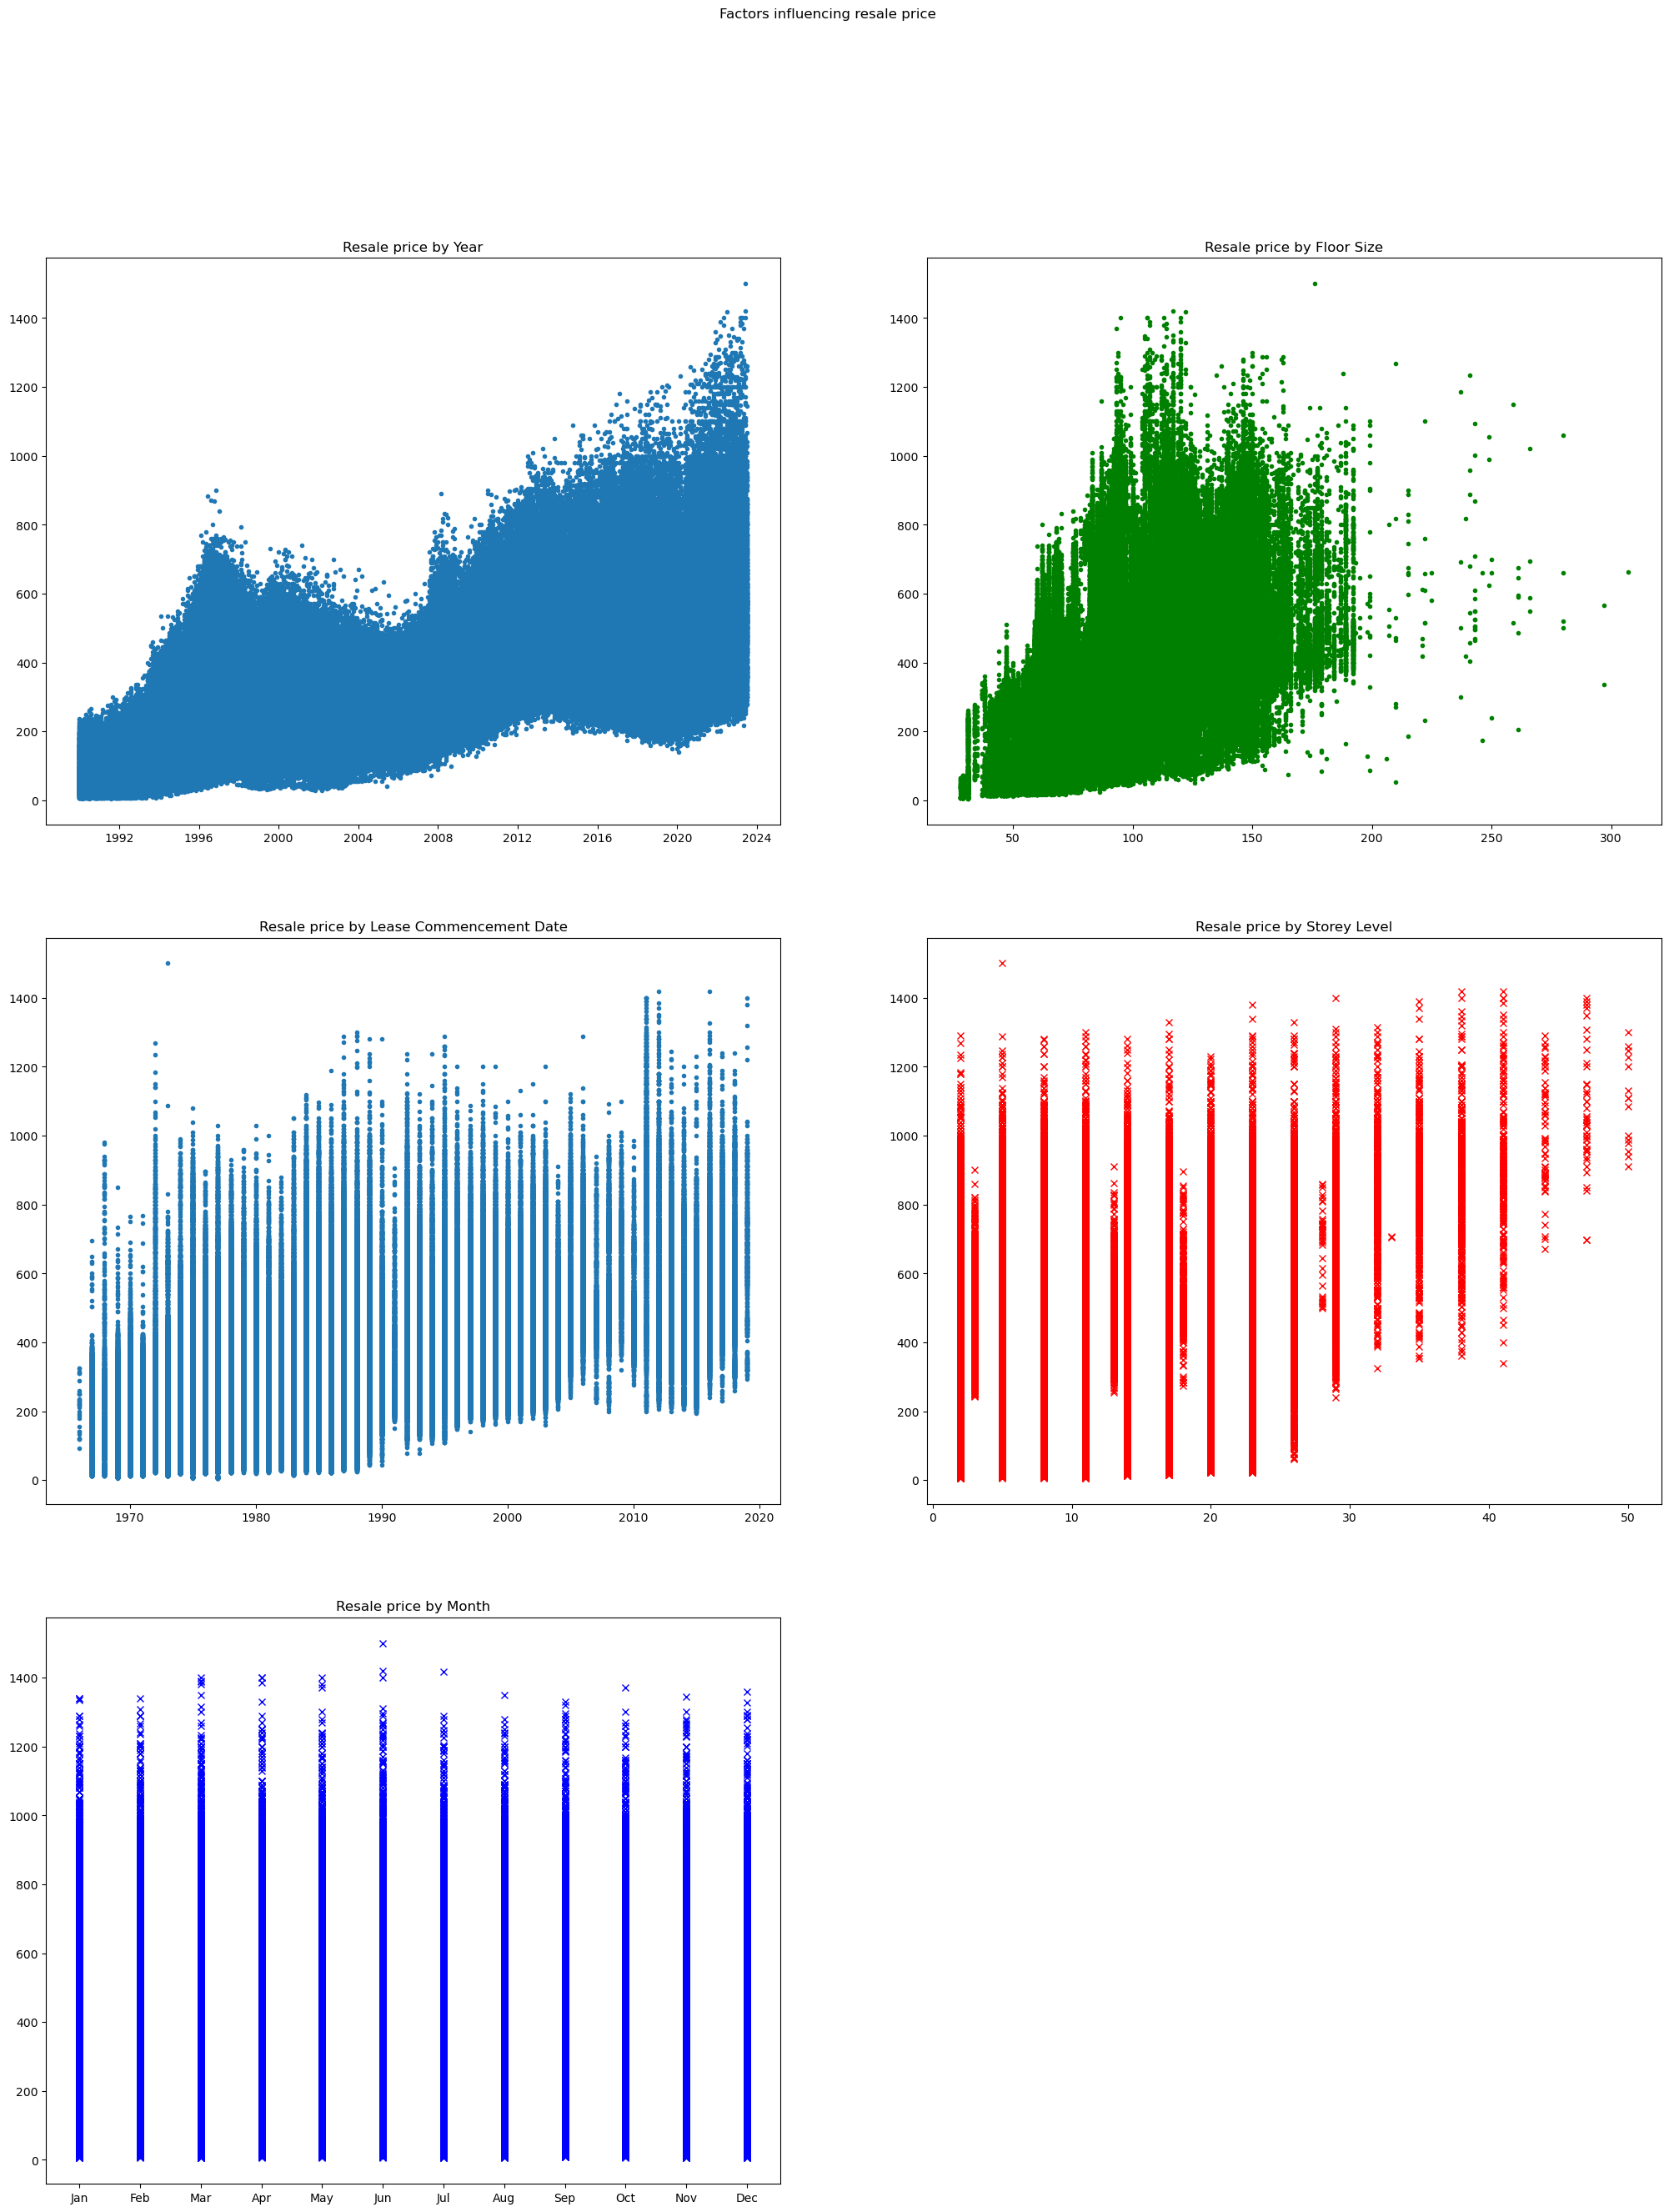

In [11]:
# Design and identify FIVE (5) factors that influence the resale price

merged_df2['resale_price_th'] = merged_df2['resale_price']/1000

fig = plt.figure(figsize=(25, 30))

axes1 = fig.add_subplot(3,2,1)

axes1.plot(merged_df2['month'],merged_df2['resale_price_th'], '.' )
axes1.set_title('Resale price by Year')

axes2 = fig.add_subplot(3,2,2)
axes2.plot(merged_df2['floor_area_sqm'],merged_df2['resale_price_th'], 'g.' )
axes2.set_title('Resale price by Floor Size')

axes3 = fig.add_subplot(3,2,3)
axes3.plot(merged_df2['lease_commence_date'],merged_df2['resale_price_th'], '.' )
axes3.set_title('Resale price by Lease Commencement Date')

axes4 = fig.add_subplot(3,2,4)
axes4.plot(merged_df2['storey_level'],merged_df2['resale_price_th'], 'rx' )
axes4.set_title('Resale price by Storey Level')

merged_df2['month_str'] = merged_df2['month'].dt.strftime('%b')
axes5 = fig.add_subplot(3,2,5)
axes5.plot(merged_df2['month_str'],merged_df2['resale_price_th'], 'bx' )
axes5.set_title('Resale price by Month')

fig.suptitle("Factors influencing resale price")
fig.show()

Some of the graphs are not clear with the scatter plots as there are too many points clustered together. Hence, we can use boxplot diagram to see the upper and lower range, and the mean which will give us a better visual of the correlations.

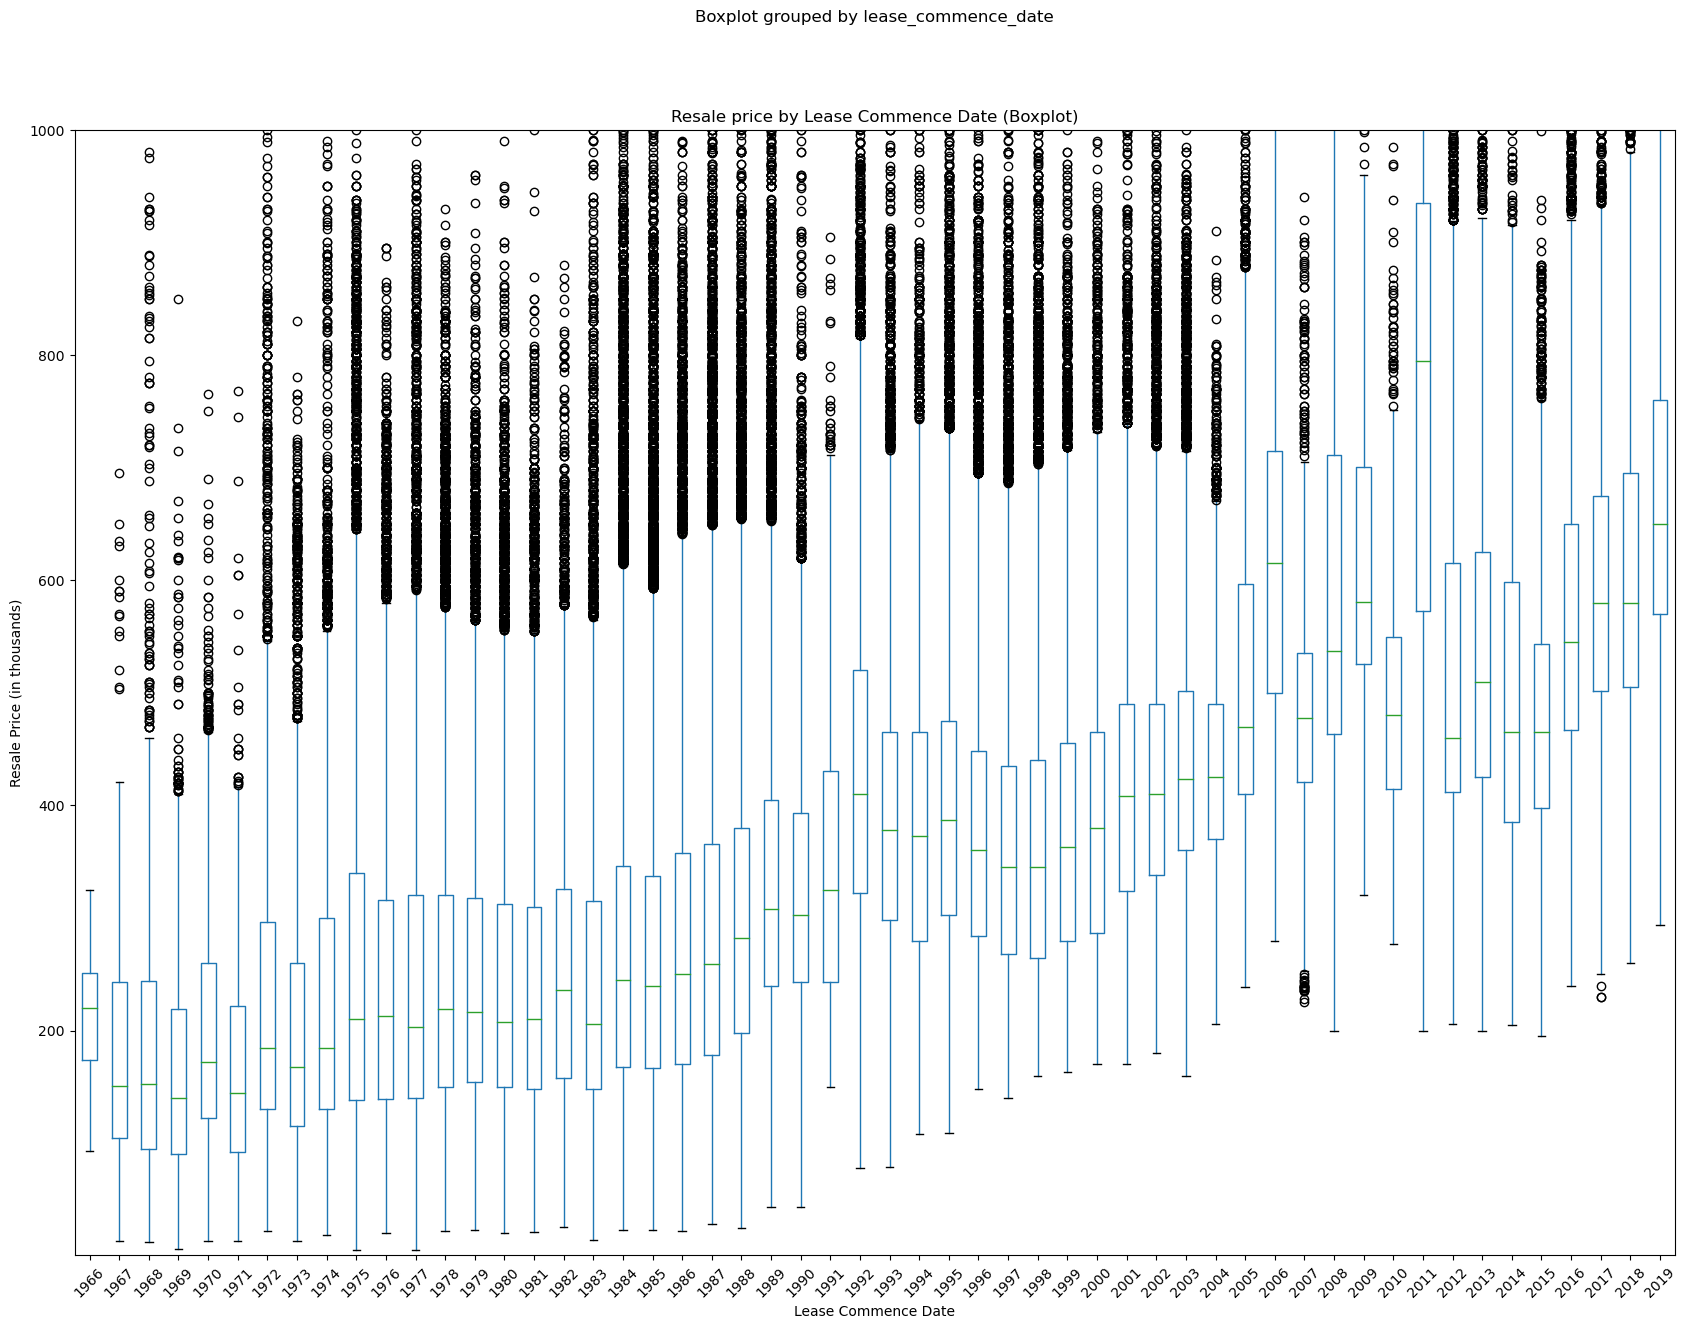

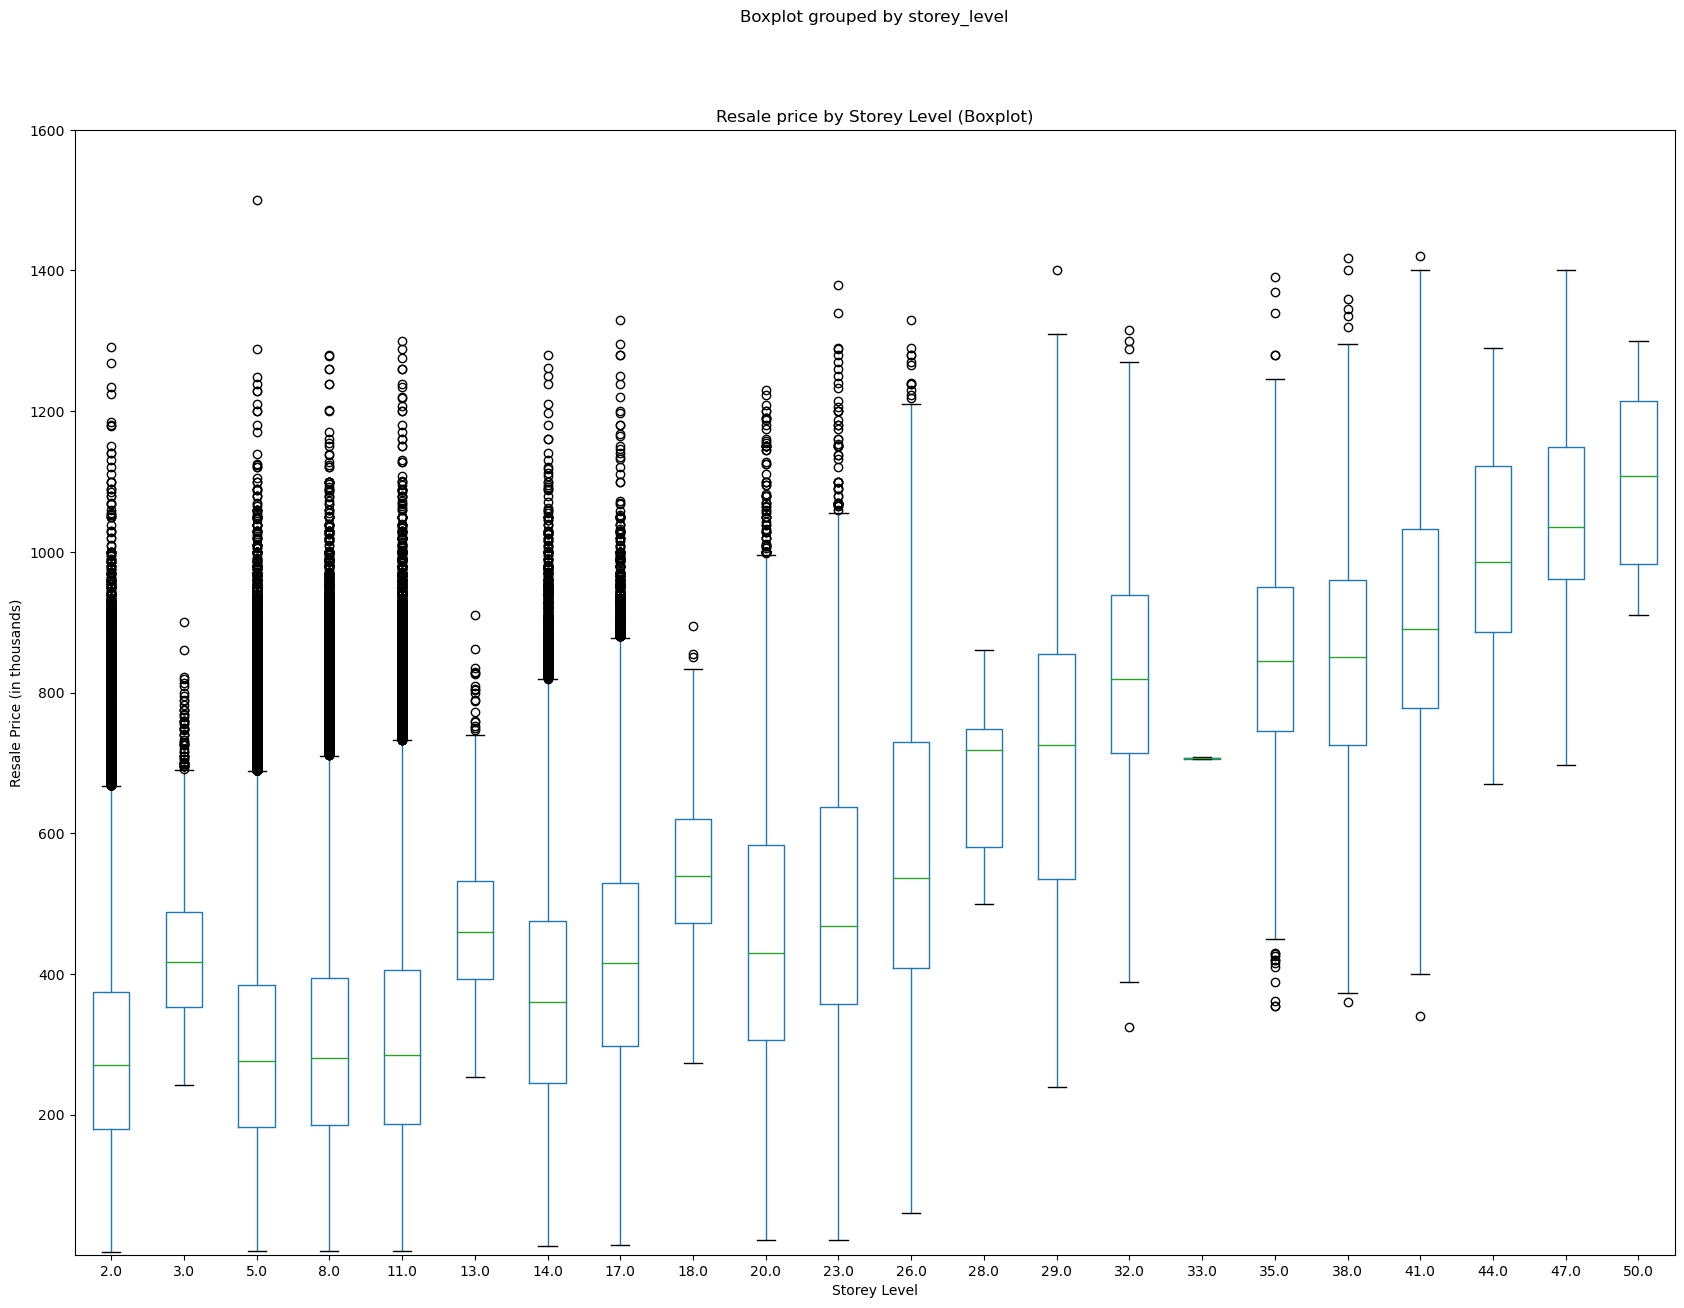

C:\Users\user\AppData\Local\Temp\ipykernel_21496\1794598491.py:44: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


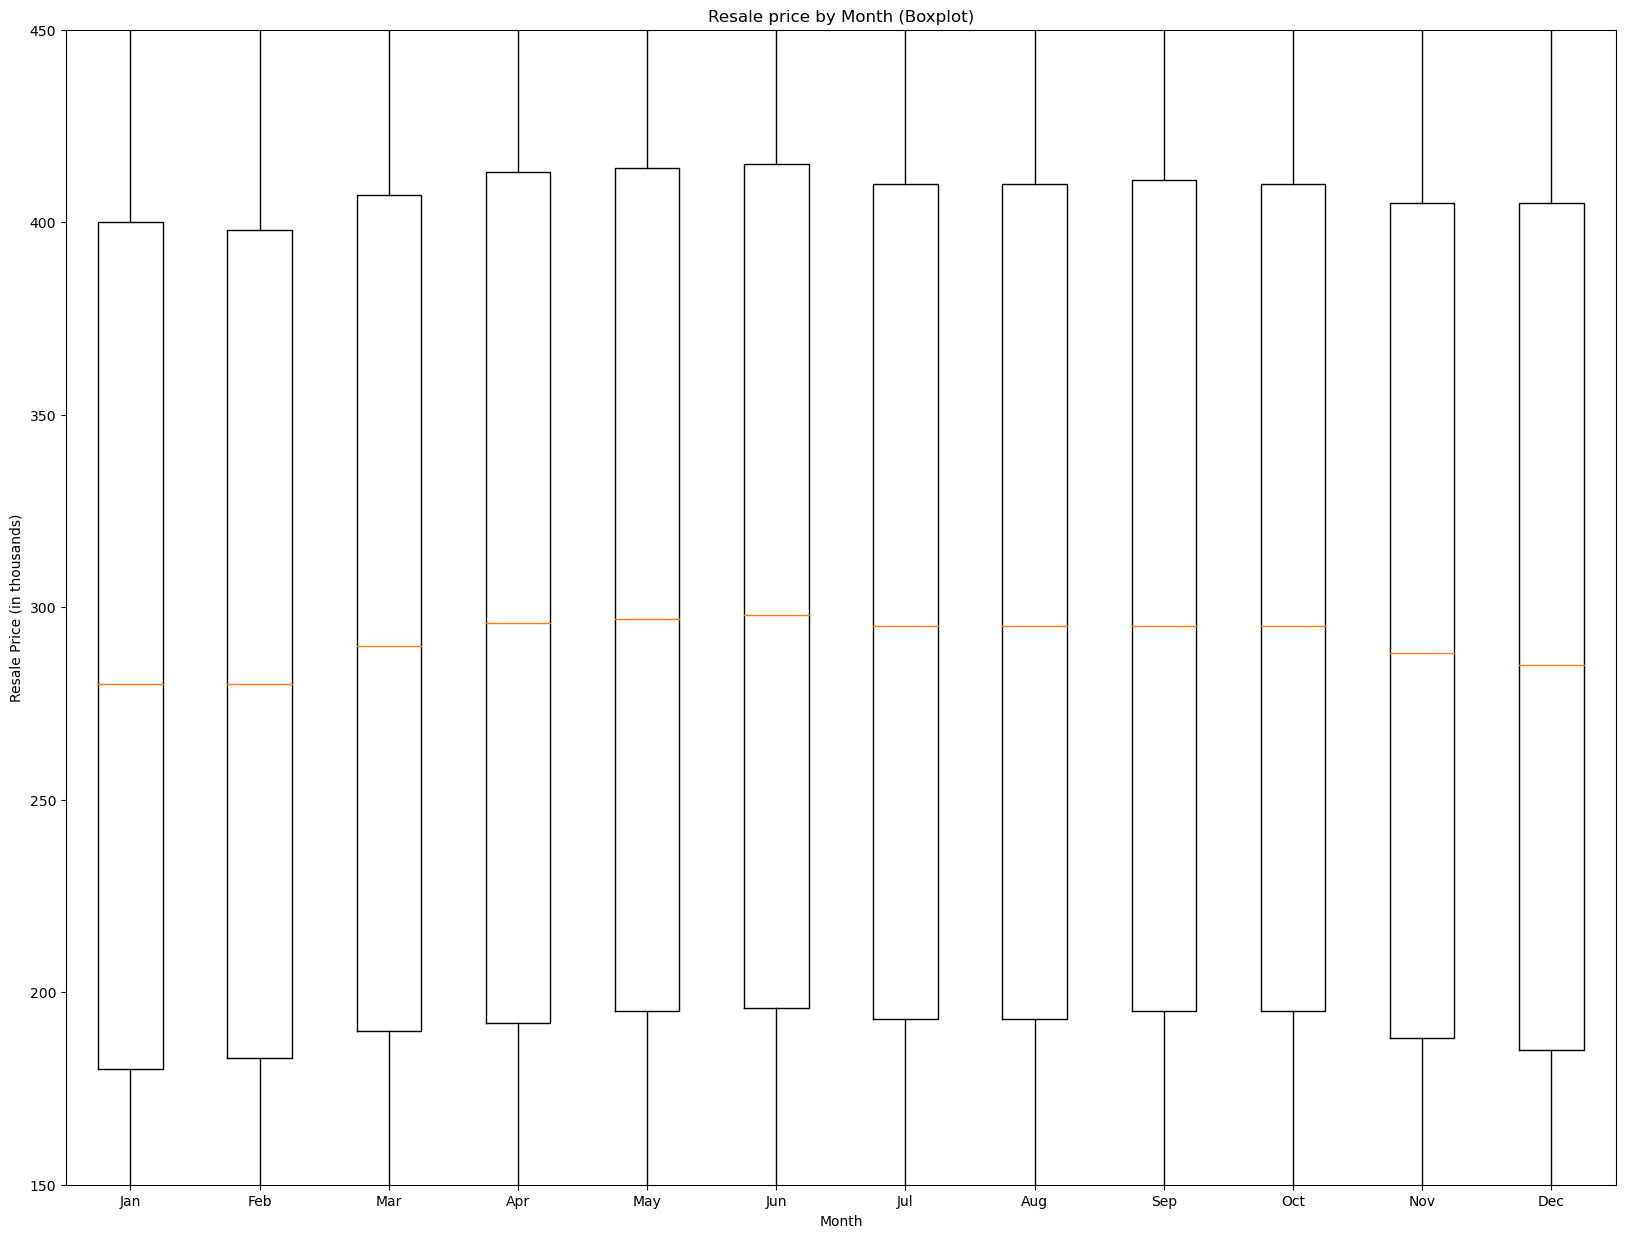

In [12]:
#Because the points on the scatter plots are too closely packed together, we can see them more clearly in the boxplot which shows the means, upper and lower quartiles.

fig, axes3_2 = plt.subplots(figsize=(20, 15))

axes3_2 = merged_df2.boxplot(column='resale_price_th', by='lease_commence_date', grid=False, ax=axes3_2)
axes3_2.set_ylim(1, 1000)
axes3_2.set_title("Resale price by Lease Commence Date (Boxplot)")
axes3_2.set_xlabel("Lease Commence Date")
axes3_2.set_ylabel("Resale Price (in thousands)")
plt.xticks(rotation=45)

plt.show()

fig, axes4_2 = plt.subplots(figsize=(20, 15))

axes4_2 = merged_df2.boxplot(column='resale_price_th', by='storey_level', grid=False, ax=axes4_2)
axes4_2.set_ylim(1, 1600)
axes4_2.set_title("Resale price by Storey Level (Boxplot)")
axes4_2.set_xlabel("Storey Level")
axes4_2.set_ylabel("Resale Price (in thousands)")

plt.show()

fig, axes5_2 = plt.subplots(figsize=(20, 15))
axes5_2.boxplot([merged_df2[merged_df2['month_str'] == 'Jan']['resale_price_th'],
merged_df2[merged_df2['month_str'] == 'Feb']['resale_price_th'],
merged_df2[merged_df2['month_str'] == 'Mar']['resale_price_th'],
merged_df2[merged_df2['month_str'] == 'Apr']['resale_price_th'],
merged_df2[merged_df2['month_str'] == 'May']['resale_price_th'],
merged_df2[merged_df2['month_str'] == 'Jun']['resale_price_th'],
merged_df2[merged_df2['month_str'] == 'Jul']['resale_price_th'],
merged_df2[merged_df2['month_str'] == 'Aug']['resale_price_th'],
merged_df2[merged_df2['month_str'] == 'Sep']['resale_price_th'],
merged_df2[merged_df2['month_str'] == 'Oct']['resale_price_th'],
merged_df2[merged_df2['month_str'] == 'Nov']['resale_price_th'],
merged_df2[merged_df2['month_str'] == 'Dec']['resale_price_th']]
)

axes5_2.set_xticklabels(merged_df2['month_str'].unique())
axes5_2.set_ylim(150, 450)
axes5_2.set_title("Resale price by Month (Boxplot)")
axes5_2.set_xlabel("Month")
axes5_2.set_ylabel("Resale Price (in thousands)")
fig.show()

offer a rationale for each of these correlations.

1. The resale price increases over the years. This is due to the housing market increasing in value and from inflation.

2. The resale price increaes as floor size of houses increases as the cost of buying a larger house is higher. Prices of houses are usually sold by per square foot/metre, which is the floor size.

3. The resale price increases when the lease commencement date increases as HDB houses have a tenure of 99 years, as such, the remaining tenure of the house when sold is (99 - (current year - lease commencement year)). As such, the value of houses with longer remaining tenure will be high than those with shorter remaining tenure.

4. The resale price increases in correlation with storey level as buyers value houses that are at higher storey level more. This could be due to various reasons such as air quality, noise, wind, insects and bugs, and smell

5. The resale prices during the period of May tend to be highest, and gradually declines to the lowest in Feb, before increasing to it's peak in May. This could be due to various reasons such as supply and demand of buyers and sellers, buyers receiving bonuses, weather and climate differences, and life stages of children's school schedule.

In [13]:
%store merged_df2

Stored 'merged_df2' (DataFrame)
